<a href="https://colab.research.google.com/github/Denisganga/RustAndYellowMosaicDiseaseDetection/blob/main/rust_and_yellow_mosaic_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
from torchvision import transforms, datasets
from google.colab import drive
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Define the path to your dataset within your Google Drive
data_dir = '/content/drive/My Drive/plant_doctor'


In [43]:
# Define transformations for preprocessing the images
transform = transforms.Compose([
    # Resize the image to a consistent size (e.g., 224x224)
    transforms.Resize((224, 224)),

    # Randomly flip the image horizontally (with a 50% probability)
    transforms.RandomHorizontalFlip(p=0.5),


    # Convert the image to a PyTorch tensor
    transforms.ToTensor(),

    # Normalize the image based on typical RGB mean and standard deviation
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [44]:
# Create a dataset using ImageFolder
# ImageFolder assumes that each subfolder in data_dir represents a different class
dataset = datasets.ImageFolder(data_dir, transform=transform)

# Define class labels based on the dataset structure
classes = dataset.classes

In [45]:
#split the dataset into training and testing tests
train_size = int(0.8*len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [46]:
print(len(dataset))
print(len(train_dataset))
print(len(test_dataset))

17
13
4


In [47]:
# Create a DataLoader for efficient data loading and batching
batch_size = 7
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

num_samples = len(dataset)

print(num_samples)


17


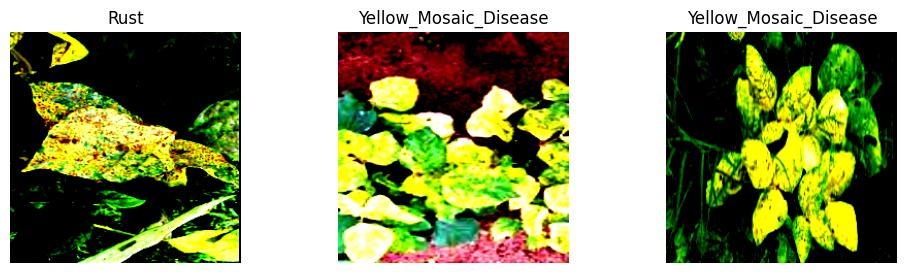

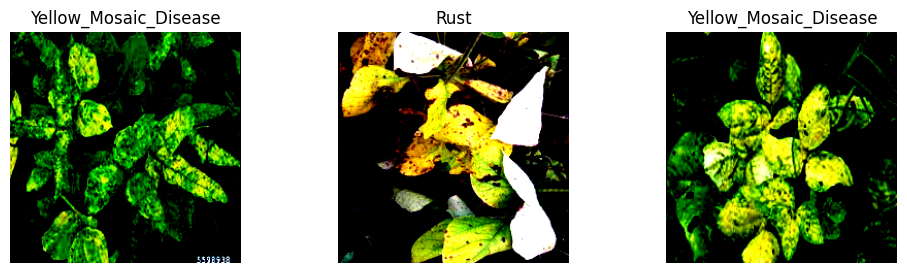

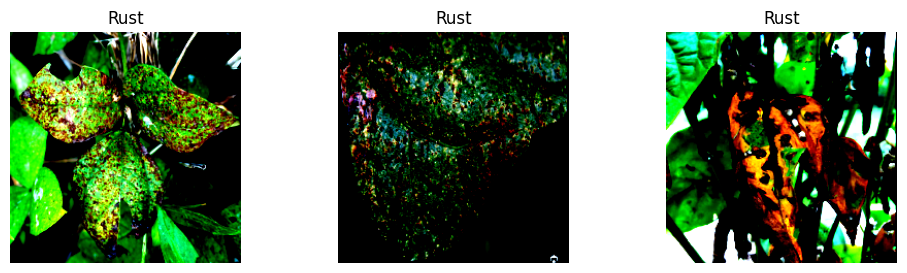

In [48]:
for images, labels in data_loader:
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    for i in range(3):
        # Convert the image tensor to a NumPy array and transpose it to (H, W, C) format
        image = images[i].numpy().transpose((1, 2, 0))
        axs[i].imshow(image)
        axs[i].set_title(classes[labels[i]])
        axs[i].axis('off')
    plt.show()


In [49]:

class BaselineModel(nn.Module):
    def __init__(self, num_classes):
        super(BaselineModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(16 * 112 * 112, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * 112 * 112)
        x = self.fc(x)
        return x

num_classes = 2
baseline_model = BaselineModel(num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(baseline_model.parameters(), lr=0.001)
